#Downloading The Dataset From Kaggle

In [1]:
cd /content/

/content


In [2]:
 !pip install -q kaggle

In [3]:
#Upload your kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedhashish","key":"b386193fa48226c1472f2f5dddd32517"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d arjuntejaswi/plant-village

 98% 323M/329M [00:03<00:00, 93.2MB/s]
100% 329M/329M [00:03<00:00, 109MB/s] 


In [8]:
!unzip plant-village.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258

In [9]:
import os

In [10]:
os.rename("PlantVillage", "Potato_Dataset")

In [12]:
import shutil

In [13]:
shutil.rmtree('/content/Potato_Dataset/Pepper__bell___Bacterial_spot/')
shutil.rmtree('/content/Potato_Dataset/Pepper__bell___healthy/')
shutil.rmtree('/content/Potato_Dataset/Tomato_Bacterial_spot/')
shutil.rmtree('/content/Potato_Dataset/Tomato_Early_blight/')
shutil.rmtree('/content/Potato_Dataset/Tomato_Late_blight/')
shutil.rmtree('/content/Potato_Dataset/Tomato_Leaf_Mold/')
shutil.rmtree('/content/Potato_Dataset/Tomato_Septoria_leaf_spot/')
shutil.rmtree('/content/Potato_Dataset/Tomato_Spider_mites_Two_spotted_spider_mite/')
shutil.rmtree('/content/Potato_Dataset/Tomato__Target_Spot/')
shutil.rmtree('/content/Potato_Dataset/Tomato__Tomato_YellowLeaf__Curl_Virus/')
shutil.rmtree('/content/Potato_Dataset/Tomato__Tomato_mosaic_virus/')
shutil.rmtree('/content/Potato_Dataset/Tomato_healthy/')

In [16]:
os.remove("plant-village.zip")

#Preparing The Dataset

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [52]:
image_size = 256
batch = 32
channels = 3
epochs = 50

In [20]:
#Import the dataset as a tf dataset data structure to help in preprocessing
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_Dataset",
    shuffle = True, #to randomly shuffle the images when loading them
    image_size = (image_size, image_size),
    batch_size = batch
)

Found 2152 files belonging to 3 classes.


####"Potato__Early_blight" is class 0

In [22]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

#### - Since we specified the batch size to be 32. Therefore, we have 68 batches.

In [23]:
len(dataset)

68

In [24]:
68 * 32

2176

In [57]:
for image_batch, labels_batch in dataset.take(1): #Takes 1 batch
    print(image_batch.shape)
    print(labels_batch.numpy())
    print(image_batch[0].shape)
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[1 0 2 1 1 2 1 2 0 0 1 1 1 0 1 1 0 2 0 1 1 2 2 0 1 0 1 1 0 0 1 1]
(256, 256, 3)
[[[142. 136. 146.]
  [143. 137. 147.]
  [144. 138. 148.]
  ...
  [157. 154. 165.]
  [155. 152. 163.]
  [154. 151. 162.]]

 [[143. 137. 147.]
  [144. 138. 148.]
  [146. 140. 150.]
  ...
  [155. 152. 163.]
  [153. 150. 161.]
  [150. 147. 158.]]

 [[145. 139. 149.]
  [146. 140. 150.]
  [147. 141. 151.]
  ...
  [153. 150. 161.]
  [150. 147. 158.]
  [147. 144. 155.]]

 ...

 [[ 92.  82.  91.]
  [ 93.  83.  92.]
  [ 93.  83.  92.]
  ...
  [101.  93. 104.]
  [104.  96. 107.]
  [105.  97. 108.]]

 [[ 88.  78.  87.]
  [ 89.  79.  88.]
  [ 90.  80.  89.]
  ...
  [101.  93. 104.]
  [107.  99. 110.]
  [109. 101. 112.]]

 [[ 87.  77.  86.]
  [ 87.  77.  86.]
  [ 89.  79.  88.]
  ...
  [ 97.  89. 100.]
  [103.  95. 106.]
  [105.  97. 108.]]]


#Dataset Visualization

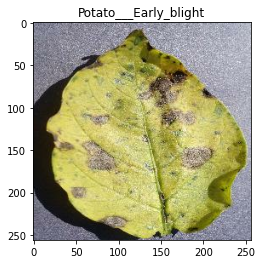

In [54]:
for image_batch, labels_batch in dataset.take(1):
  plt.title(class_name[labels_batch[0]])
  plt.imshow(image_batch[0].numpy().astype("uint8"))

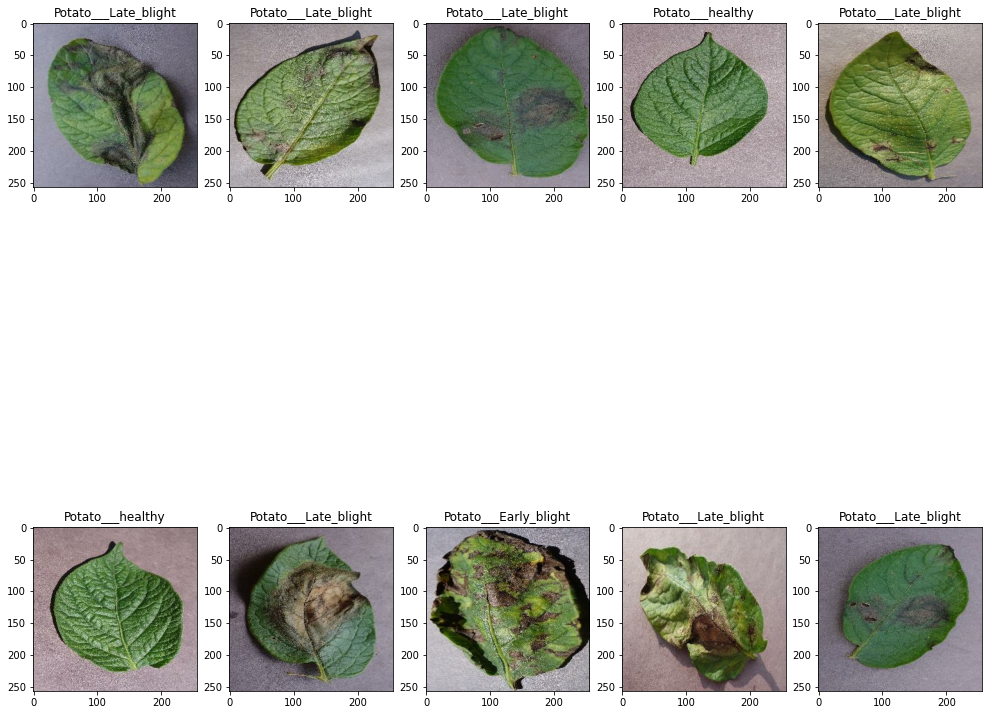

In [50]:
plt.figure(figsize = (17,17)) #To prevent images from overlapping
for image_batch, labels_batch in dataset.take(1):
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(class_name[labels_batch[i]])
    plt.imshow(image_batch[i].numpy().astype("uint8"))

#Splitting Dataset

In [51]:
len(dataset)

68

In [59]:
from typing_extensions import dataclass_transform
#We will split into 80% train, 10% validation (we will use these 10% after each epoch in the training) & 10% test (we will use these 10% after all the epochs finish)
train_split = 0.8
len(dataset) * train_split

54.400000000000006

In [61]:
train_dataset = dataset.take(54)
len(train_dataset)

In [62]:
test_dataset = dataset.skip(54)

In [65]:
val_split = 0.1
len(dataset) * val_split

6.800000000000001

In [66]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [67]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [68]:
#Let us write the above code into a function
def train_test_val_splitter(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
  ds_size = len(ds)
  if(shuffle):
    ds = ds.shuffle(shuffle_size, seed = 7)
     #For perfect shuffling, set the buffer size equal to the full size of the dataset.
     #For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer.
  train_size = int(ds_size * train_split)
  val_size = int(ds_size * val_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [70]:
train_dataset, val_dataset, test_dataset = train_test_val_splitter(dataset)

In [71]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

54 6 8


####We will use chaching and prefetching to increase the speed
- Cahing: The first time we need an image, it will be read from the disk. The second time we need the same image, it will be read from memory. Only do this if you have enough RAM.

- Prefetching: If the GPU is busy training, we will load the next batch of images from the disk using the CPU.

In [74]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) #tf.data.AUTOTUNE lets TensorFlow determine how many batches to load while training 
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

#Preprocessing The Dataset

In [ ]:
resizing_rescaling = tf.kera.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255) #To rescale an input in the [0, 255] range to be in the [0, 1] 
])

In [ ]:
data_augmentation = tf.kera.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])